In [1]:
import os
import scanpy as sc
import anndata as ad
import matplotlib.pyplot as plt

os.chdir("/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test")

In [2]:
# Load cell metadata and latent space

adata = ad.read_h5ad("data/mouse_ACA_kallisto_gene_abundance_scvi_model_matrix_exon_all_PSI.h5ad")

In [20]:
adata.shape

(5099, 40777)

,n_cells,gene_name
ENSMUSG00000102693.2,11,4933401J01Rik
ENSMUSG00000051951.6,1526,Xkr4
ENSMUSG00000102851.2,71,Gm18956
ENSMUSG00000103377.2,816,Gm37180
ENSMUSG00000104017.2,1681,Gm37363
...,...,...
ENSMUSG00000064368.1,5098,mt-Nd6
ENSMUSG00000064369.1,4328,mt-Te
ENSMUSG00000064370.1,5099,mt-Cytb
ENSMUSG00000064371.1,725,mt-Tt


In [3]:
sc.pp.neighbors(adata, use_rep="scVI")
sc.tl.umap(adata, min_dist=0.3)

/mnt/lareaulab/reliscu/anaconda3/envs/anndata/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


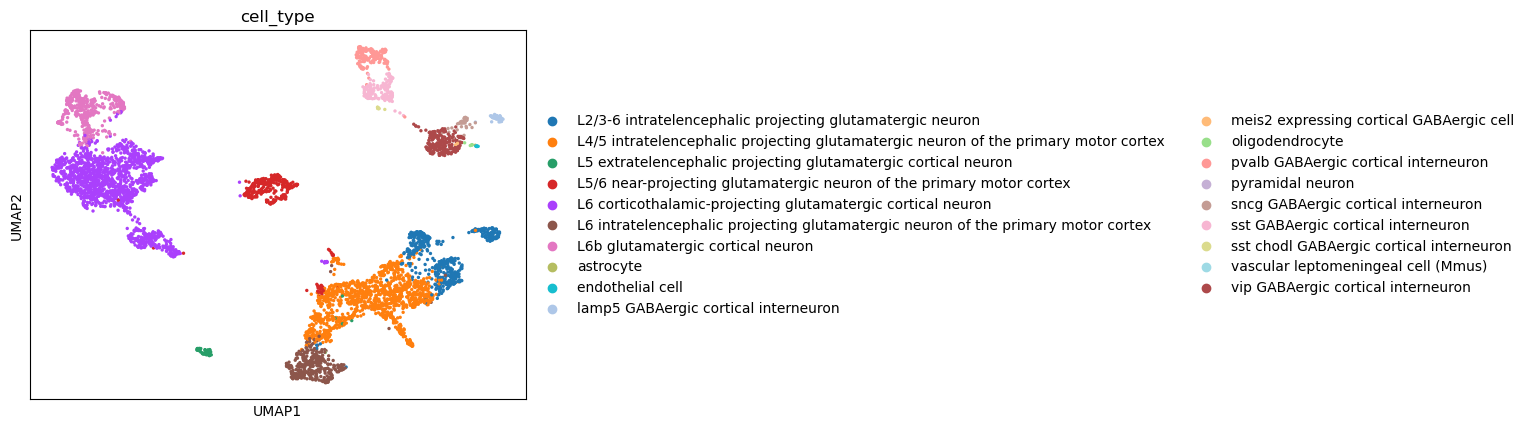

In [4]:
sc.pl.umap(adata, color=['cell_type'])

In [ ]:
# sc.pl.umap(adata, 
#            color=['ENSMUSG00000055805.16', 'ENSMUSG00000055805.16'], 
#            title=['Fmnl1 exon PSI', 'Fmnl1 gene expression'])

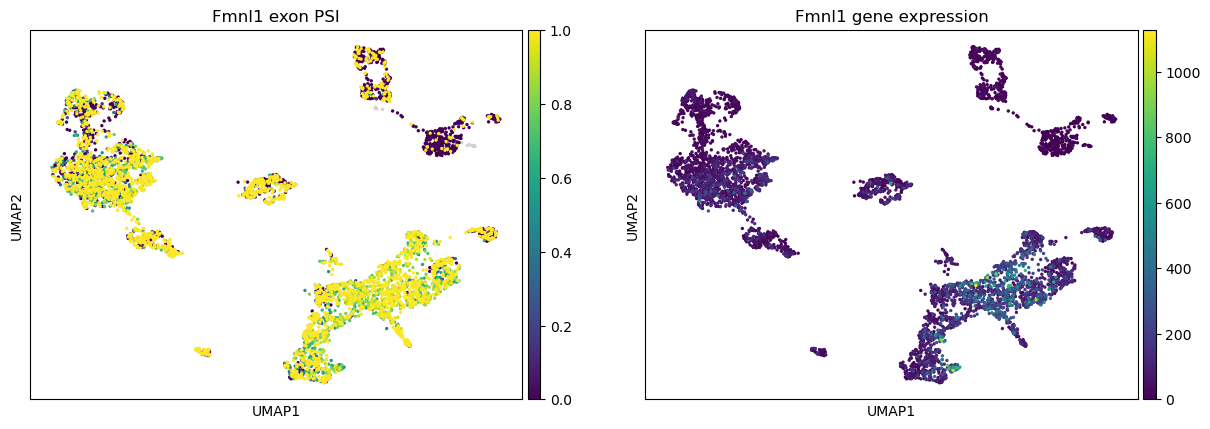

In [18]:
sc.pl.umap(adata, 
           color=['ENSMUSG00000055805_ProteinCoding_3', 'ENSMUSG00000055805.16'], 
           title=['Fmnl1 exon PSI', 'Fmnl1 gene expression'])

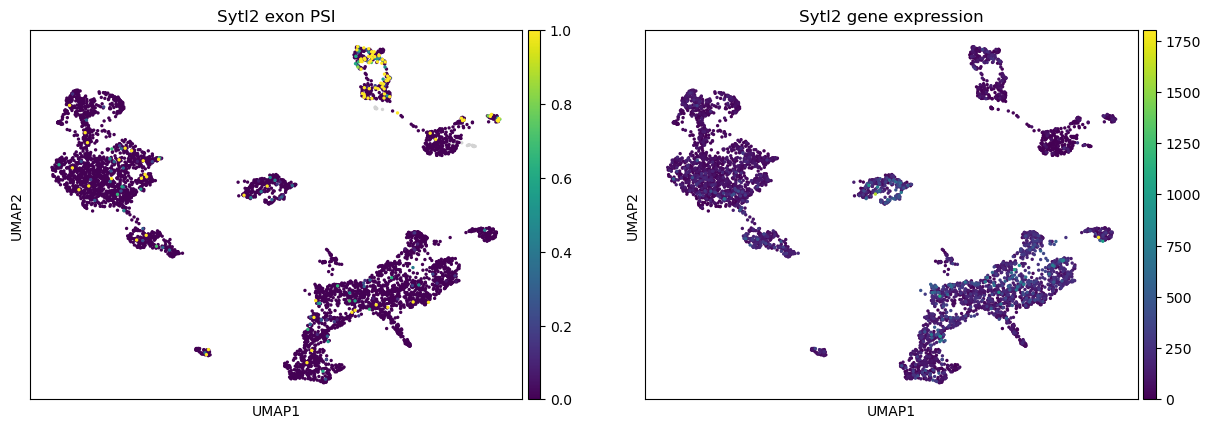

In [6]:
sc.pl.umap(adata, 
           color=['ENSMUSG00000030616_ProteinCoding_1', 'ENSMUSG00000030616.17'], 
           title=['Sytl2 exon PSI', 'Sytl2 gene expression'])

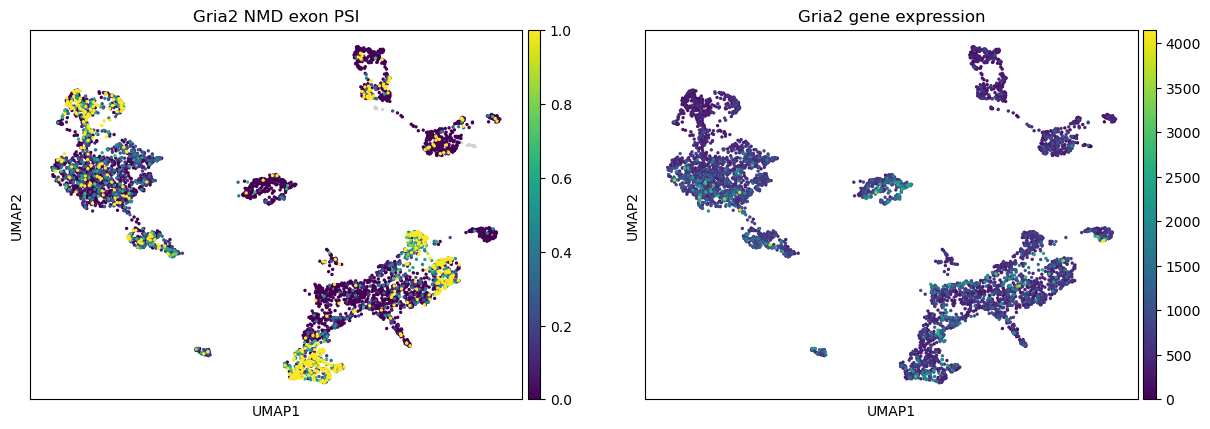

In [7]:
# Gria2 (2 exons detected)
# Cors: 0.652236089084128, 0.617346540889922
# Cell types: L6 intratelencephalic projecting glutamatergic neuron of the primary motor cortex, L2/3-6 intratelencephalic projecting glutamatergic neuron

sc.pl.umap(adata, 
           color=['ENSMUSG00000033981_NMD_1', 'ENSMUSG00000033981.15'], 
           title=['Gria2 NMD exon PSI', 'Gria2 gene expression'])

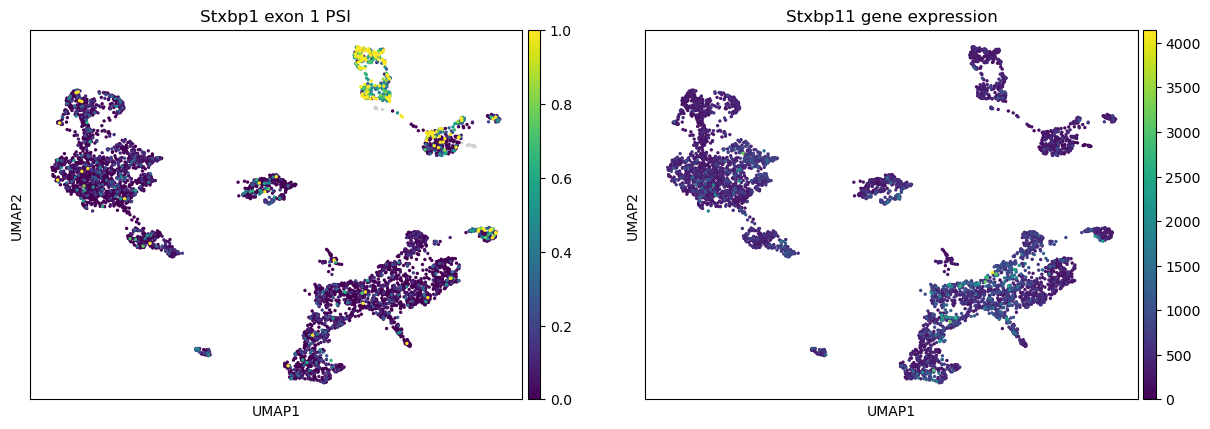

In [8]:
# Stxbp1 (1 exons detected)
# Cors: 0.744389529352848, 0.706060194824461 
# Cell types: pvalb GABAergic cortical interneuron, sst GABAergic cortical interneuron

sc.pl.umap(adata, 
           color=['ENSMUSG00000026797_ProteinCoding_1', 'ENSMUSG00000026797.17'], 
           title=['Stxbp1 exon 1 PSI', 'Stxbp11 gene expression'])

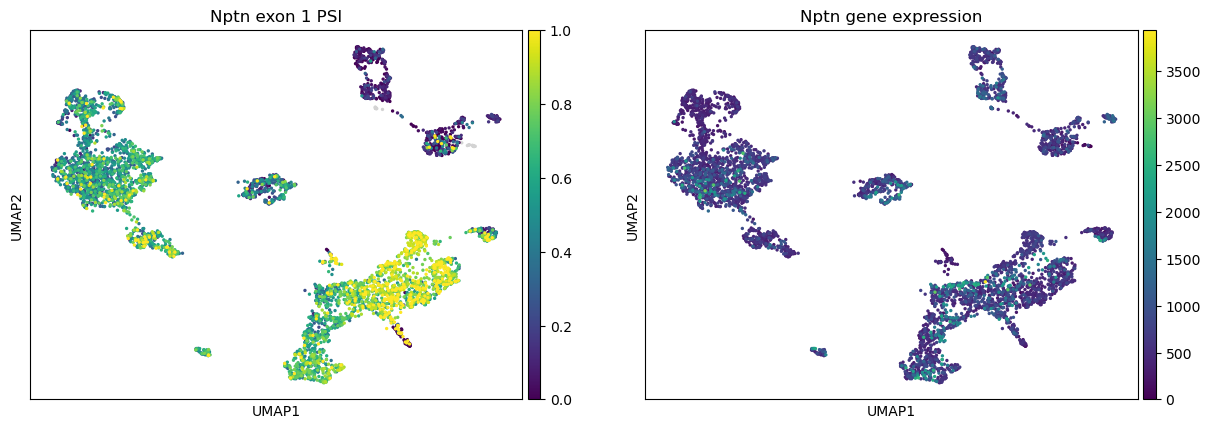

In [9]:
# Nptn (4 exons detected)
# Cors:
# Cell types: 

sc.pl.umap(adata, 
           color=['ENSMUSG00000032336_ProteinCoding_1', 'ENSMUSG00000032336.19'], 
           title=['Nptn exon 1 PSI', 'Nptn gene expression'])

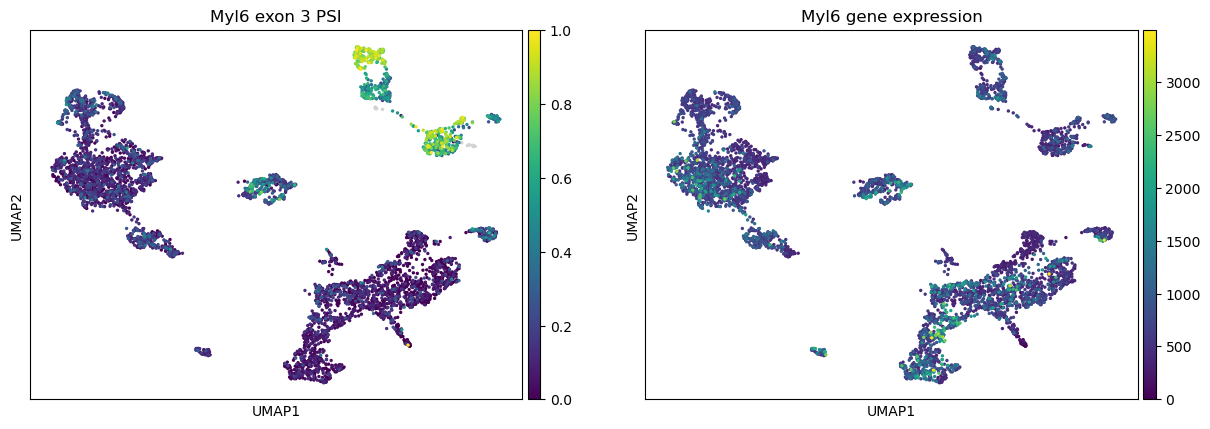

In [10]:
# Myl6 (2 exons detected)
# Cors: 0.80184095877892, 0.527086088295336, 0.492621807535675
# Cell types: pvalb GABAergic cortical interneuron, sst GABAergic cortical interneuron, vip GABAergic cortical interneuron

sc.pl.umap(adata, 
           color=['ENSMUSG00000090841_ProteinCoding_3', 'ENSMUSG00000090841.3'], 
           title=['Myl6 exon 3 PSI', 'Myl6 gene expression'])

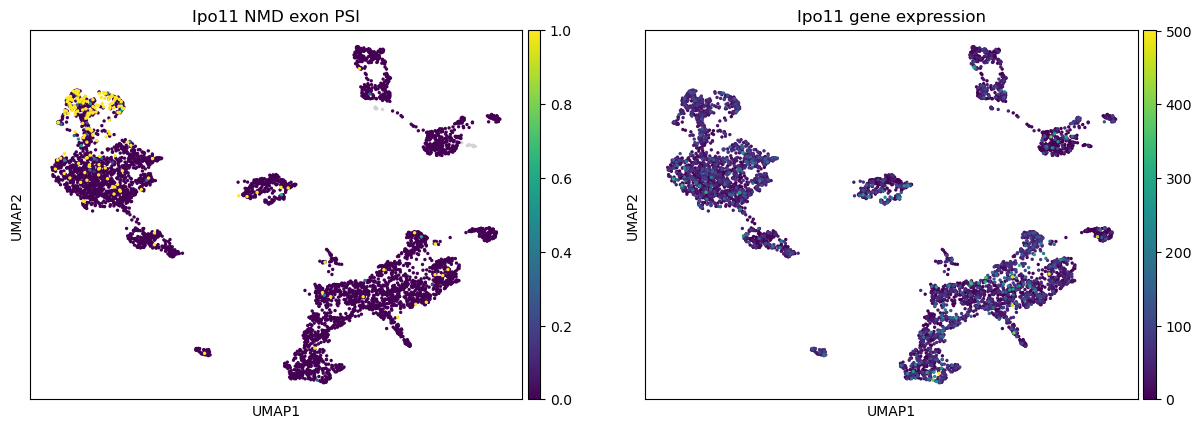

In [11]:
# Ipo11 (2 exons detected)
# Cors: 0.789167223018318, 0.46043445816633
# Cell types: L6b glutamatergic cortical neuron, L6 corticothalamic-projecting glutamatergic cortical neuron

sc.pl.umap(adata, 
           color=['ENSMUSG00000042590_NMD_1', 'ENSMUSG00000042590.18'], 
           title=['Ipo11 NMD exon PSI', 'Ipo11 gene expression'])

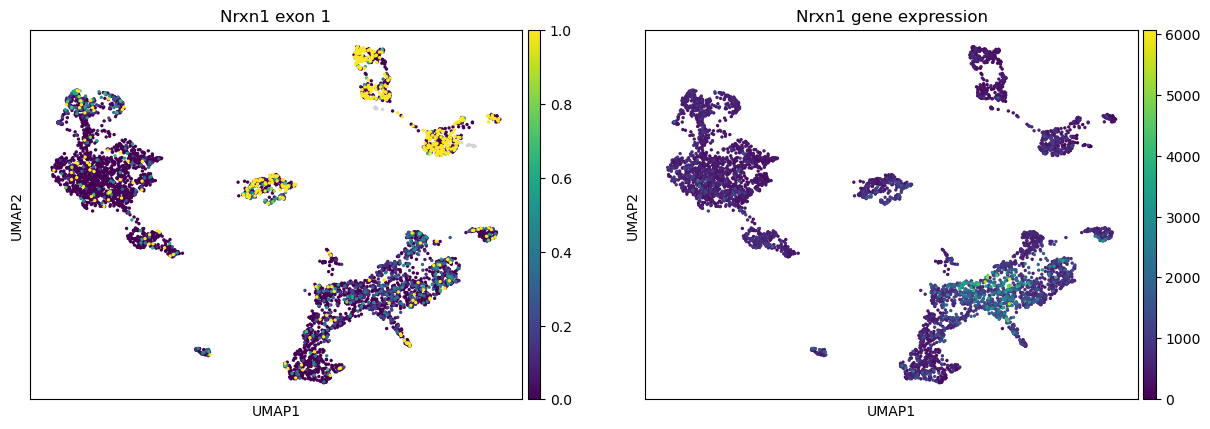

In [12]:
# Nrxn1 (5 exons detected)
# Cors: 0.61829769769037, 0.425207060075292, 0.349287893333654
# Cell types: vip GABAergic cortical interneuron, L5/6 near-projecting glutamatergic neuron of the primary motor cortex, pvalb GABAergic cortical interneturon

sc.pl.umap(adata, 
           color=['ENSMUSG00000024109_ProteinCoding_1', 'ENSMUSG00000024109.19'], 
           title=['Nrxn1 exon 1', 'Nrxn1 gene expression'])

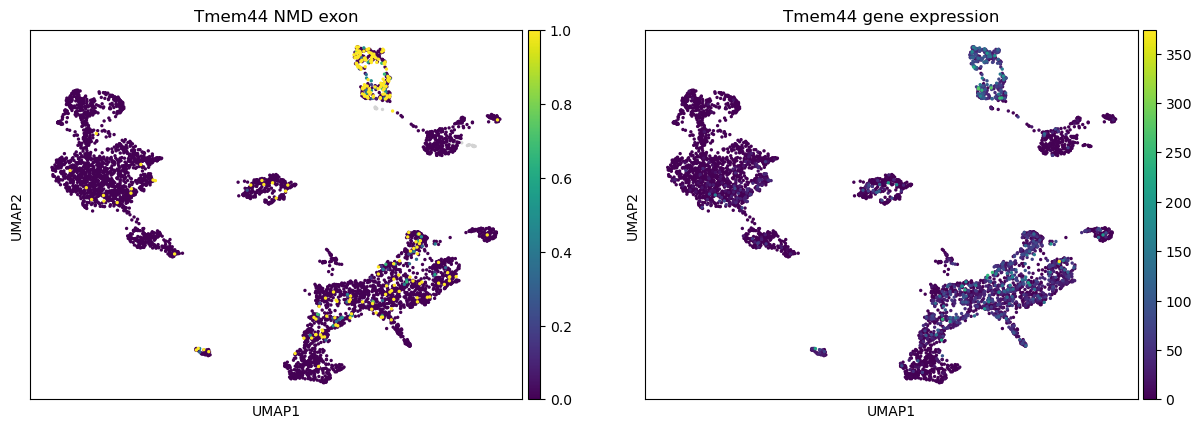

In [13]:
# Tmem44 (4 exons detected)
# Cors: 0.576198068473254, 0.439915817860295
# Cell types: sst GABAergic cortical interneuron, pvalb GABAergic cortical interneuron

sc.pl.umap(adata, 
           color=['ENSMUSG00000022537_NMD_2', 'ENSMUSG00000022537.19'], 
           title=['Tmem44 NMD exon', 'Tmem44 gene expression'])

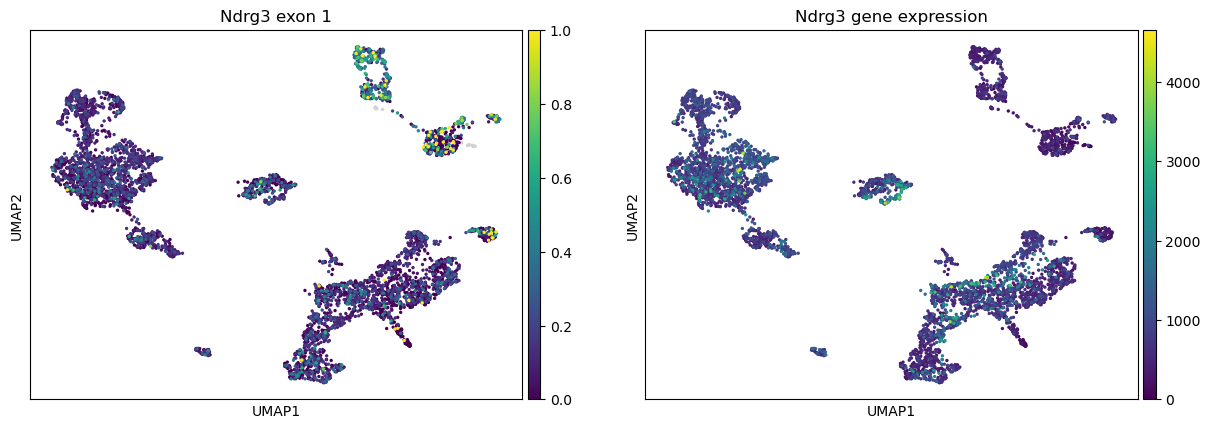

In [14]:
# Ndrg3
# Cors: 0.516628224952086, 0.381655809491207
# Cell types: pvalb GABAergic cortical interneuron, sst GABAergic cortical interneuron

sc.pl.umap(adata, 
           color=['ENSMUSG00000027634_ProteinCoding_1', 'ENSMUSG00000027634.15'], 
           title=['Ndrg3 exon 1', 'Ndrg3 gene expression'])